## Portuguese Meals Classification
[Google Colab Notebook]()
\
[Dataset](https://www.kaggle.com/datasets/catarinaantelo/portuguese-meals)

## Mounting Gdrive and Importing Data Set



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          11086        331  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           3181         84  1.0              
harshsingh2209/tesla-stock-pricing-20172022                    TESLA stock pricing (2017-2022)                      28KB  2022-09-18 14:56:29            592         24  1.0              
thedevastator/airplane-crashes-

In [3]:
!kaggle datasets download -d catarinaantelo/portuguese-meals

!unzip /content/portuguese-meals.zip

Streaming output truncated to the last 5000 lines.
  inflating: portuguese_food_2/bolo_chocolate/2969347.jpg  
  inflating: portuguese_food_2/bolo_chocolate/2993321.jpg  
  inflating: portuguese_food_2/bolo_chocolate/2997853.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3.jpg  
  inflating: portuguese_food_2/bolo_chocolate/30.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3000726.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3009919.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3016036.jpg  
  inflating: portuguese_food_2/bolo_chocolate/301677.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3021109.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3026168.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3032251.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3047338.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3063900.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3075740.jpg  
  inflating: portuguese_food_2/bolo_chocolate/3087452.jpg  
 

In [4]:
IMAGE_DIR = "/content/portuguese_food_2"

In [5]:
# Remove txt file from the Image directory
import os
if os.path.exists(IMAGE_DIR+"Rice_Citation_Request.txt"):
  os.remove(IMAGE_DIR+"Rice_Citation_Request.txt")

# Create a list of all the class names
class_names = sorted(os.listdir(IMAGE_DIR))
print("Number of classes :",len(class_names))
class_names

Number of classes : 23


['aletria',
 'arroz_cabidela',
 'bacalhau_bras',
 'bacalhau_natas',
 'batatas_fritas',
 'bolo_chocolate',
 'cachorro',
 'caldo_verde',
 'cozido_portuguesa',
 'croissant',
 'donuts',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'gelado',
 'hamburguer',
 'jardineira',
 'nata',
 'ovo',
 'pasteis_bacalhau',
 'pizza',
 'tripas_moda_porto',
 'waffles']

# Split into train, test and validation data (using [splitfolders](https://pypi.org/project/split-folders/))

In [6]:
!pip install split-folders

import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting the data into 3 datasets:**
* 70% in training dataset
* 20% in validation dataset
* 10% in testing dataset

In [7]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 6726 files [00:02, 2887.08 files/s]


In [8]:
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

## Viewing the data set

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

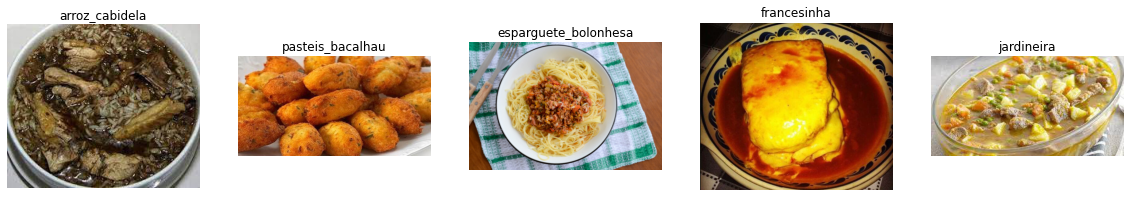

In [10]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)

view_random_images(TRAIN_DIR, class_names=class_names)
    

## Create ImageDataGenerators

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="categorical")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 4697 images belonging to 23 classes.
Found 1337 images belonging to 23 classes.
Found 692 images belonging to 23 classes.


# Creating a basic model

In [13]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 23)                115       
                                                                 
Total params: 602,251
Trainable params: 602,251
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [14]:
history_1 = model_1.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
147/147 [==============================] - 58s 382ms/step - loss: 3.3998 - accuracy: 0.0698 - val_loss: 3.0777 - val_accuracy: 0.0808
Epoch 2/20
147/147 [==============================] - 52s 354ms/step - loss: 3.0536 - accuracy: 0.0805 - val_loss: 3.0292 - val_accuracy: 0.0808
Epoch 3/20
147/147 [==============================] - 51s 346ms/step - loss: 3.0109 - accuracy: 0.0805 - val_loss: 2.9913 - val_accuracy: 0.0808
Epoch 4/20
147/147 [==============================] - 50s 344ms/step - loss: 2.9776 - accuracy: 0.0805 - val_loss: 2.9615 - val_accuracy: 0.0808
Epoch 5/20
147/147 [==============================] - 52s 354ms/step - loss: 2.9518 - accuracy: 0.0805 - val_loss: 2.9389 - val_accuracy: 0.0808
Epoch 6/20
147/147 [==============================] - 51s 347ms/step - loss: 2.9319 - accuracy: 0.0805 - val_loss: 2.9212 - val_accuracy: 0.0808
Epoch 7/20
147/147 [==============================] - 51s 345ms/step - loss: 2.9166 - accuracy: 0.0805 - val_loss: 2.9076 - val_ac

## Plot the Curves

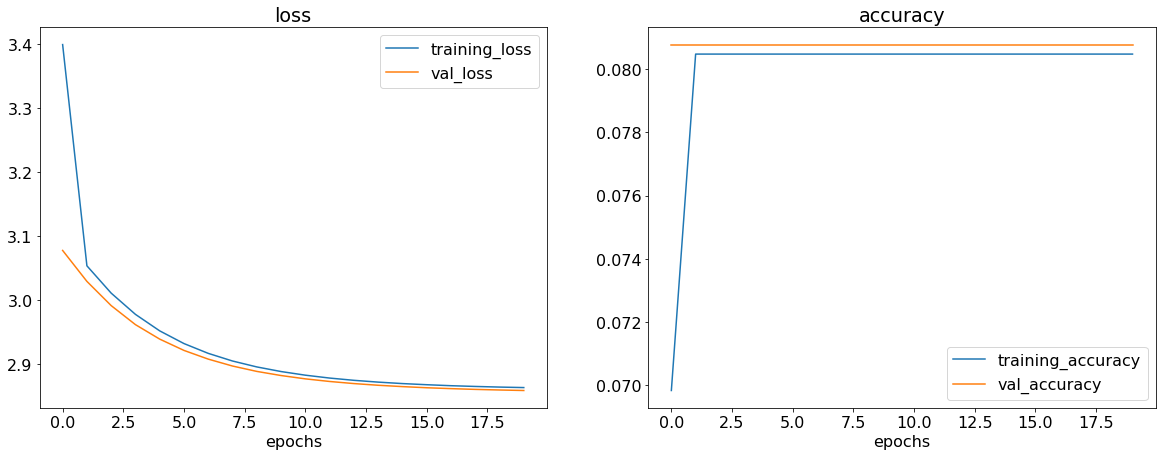

In [15]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
plot_curves(history_1)

## Prediction on testing data

In [16]:
model_1.evaluate(test_data)
model_1.save("/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model1.h5")

22/22 [==============================] - 5s 248ms/step - loss: 2.8857 - accuracy: 0.0795


## Improving the model (Adding Convolutional Layers)

In [17]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 23)                10930543  
                                                                 
Total params: 10,932,643
Trainable params: 10,932,643
Non-trainable params: 0
_________________________________________________________________


## Train the model

Epoch 1/10
147/147 [==============================] - 54s 366ms/step - loss: 5.5535e-05 - accuracy: 1.0000 - val_loss: 4.4628 - val_accuracy: 0.4159
Epoch 2/10
147/147 [==============================] - 53s 360ms/step - loss: 4.7961e-05 - accuracy: 1.0000 - val_loss: 4.5333 - val_accuracy: 0.4151
Epoch 3/10
147/147 [==============================] - 54s 368ms/step - loss: 4.1821e-05 - accuracy: 1.0000 - val_loss: 4.5759 - val_accuracy: 0.4159
Epoch 4/10
147/147 [==============================] - 53s 358ms/step - loss: 3.6567e-05 - accuracy: 1.0000 - val_loss: 4.6011 - val_accuracy: 0.4136
Epoch 5/10
147/147 [==============================] - 53s 359ms/step - loss: 3.2007e-05 - accuracy: 1.0000 - val_loss: 4.6748 - val_accuracy: 0.4151
Epoch 6/10
147/147 [==============================] - 54s 367ms/step - loss: 2.8267e-05 - accuracy: 1.0000 - val_loss: 4.7074 - val_accuracy: 0.4151
Epoch 7/10
147/147 [==============================] - 53s 360ms/step - loss: 2.5050e-05 - accuracy: 1.0000

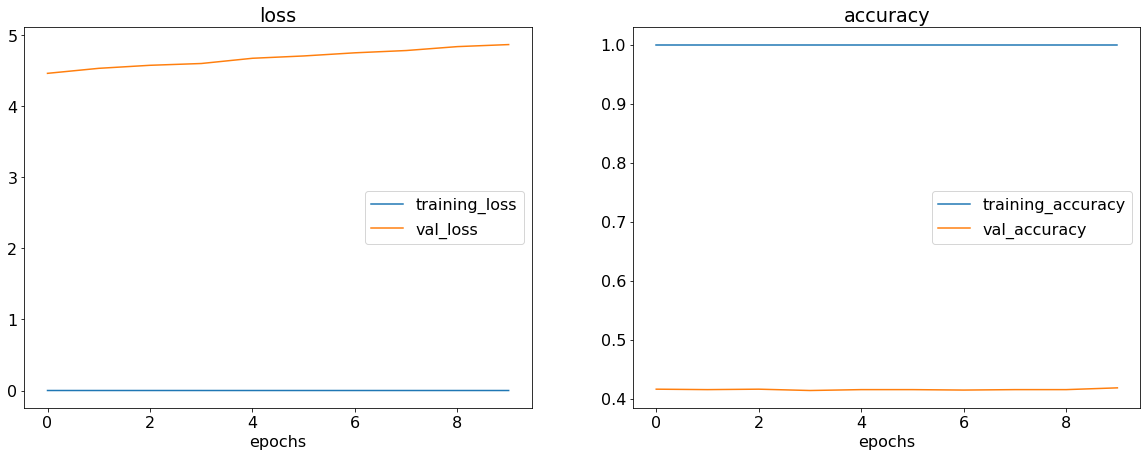

In [21]:
history_2 = model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))


plot_curves(history_2)

model_2.evaluate(test_data)

model_2.save("/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model2.h5")

## Improving the model further (Adding MaxPooling Layers)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

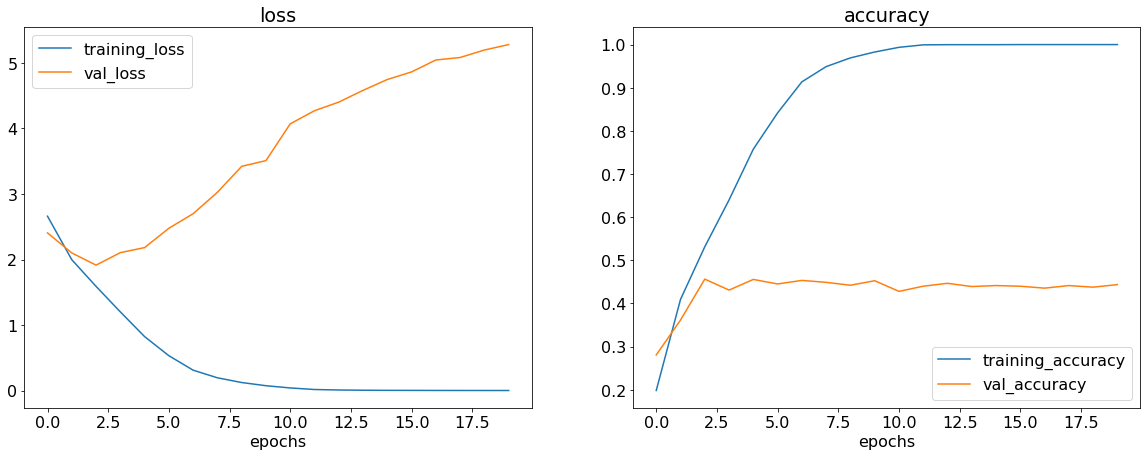

In [22]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.summary()

history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

plot_curves(history_3)

In [23]:
model_3.evaluate(test_data)

22/22 [==============================] - 5s 249ms/step - loss: 5.4322 - accuracy: 0.4509


[5.432173252105713, 0.45086705684661865]

In [24]:
model_3.save("/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model3.h5")

## Prediction Making

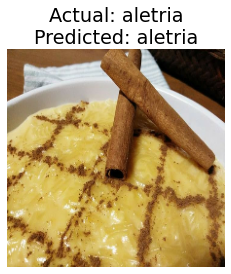

In [29]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

pred_random_image(model_3, TEST_DIR, class_names)

In [31]:
for x in range(3):
  s = ["/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model1.h5","/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model2.h5","/content/gdrive/MyDrive/ML_and_DL/Portuguese Meals Detection/model3.h5"]
  model = tf.keras.models.load_model(s[x])
  results = model.evaluate(test_data, verbose=0)
  print("For Model", x+1)
  print("Loss: {:.3f}".format(results[0]))
  print("Accuracy: {:.3}%".format(results[1] * 100))

For Model 1
Loss: 2.886
Accuracy: 7.95%
For Model 2
Loss: 4.954
Accuracy: 42.6%
For Model 3
Loss: 5.432
Accuracy: 45.1%
